In [123]:
import pandas as pd

# Cargar archivo desde GitHub (usando el enlace "raw")
url = "https://raw.githubusercontent.com/CelesteMonge/Challenge-Telecom-2/main/telecomx_churn_clean.csv"
df = pd.read_csv(url)

# Revisar el dataset
df.head()


,customerID,Churn,customer,phone,internet,account,Monthly,Cuentas_Diarias,tenure,Total,gender
0,0002-ORFBO,no,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",65.6,2.186667,9,NaN,Female
1,0003-MKNFE,no,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",59.9,1.996667,9,NaN,Male
2,0004-TLHLJ,yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",73.9,2.463333,4,NaN,Male
3,0011-IGKFF,yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",98.0,3.266667,13,NaN,Male
4,0013-EXCHZ,yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",83.9,2.796667,3,NaN,Female


In [124]:

# Revisar valores únicos en cada columna
print("\nValores únicos por columna:")
print(df.nunique())


Valores únicos por columna:
customerID         7043
Churn                 2
customer            891
phone                 3
internet            129
account            6931
Monthly            1585
Cuentas_Diarias    1585
tenure               73
Total                 0
gender                2
dtype: int64


In [125]:
# Eliminar columnas irrelevantes
cols_to_drop = []

# 1. Columna identificador
if "customerID" in df.columns:
    cols_to_drop.append("customerID")

if "customer" in df.columns:
    cols_to_drop.append("customer")

# 2. Columna Total
if df["Total"].nunique() <= 1:   # Si tiene un solo valor en toda la columna
    cols_to_drop.append("Total")

# 3. Columna account
if "account" in df.columns:
    cols_to_drop.append("account")

for col in df.columns:
    if df[col].nunique() == 1:
        cols_to_drop.append(col)

# Quitar duplicados de la lista
cols_to_drop = list(set(cols_to_drop))

print("\nColumnas que se van a eliminar:", cols_to_drop)

# Eliminar columnas
df = df.drop(columns=cols_to_drop)

print("\nDataset limpio:")
display(df.head())


Columnas que se van a eliminar: ['customerID', 'customer', 'Total', 'account']

Dataset limpio:


,Churn,phone,internet,Monthly,Cuentas_Diarias,tenure,gender
0,no,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",65.6,2.186667,9,Female
1,no,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",59.9,1.996667,9,Male
2,yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",73.9,2.463333,4,Male
3,yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",98.0,3.266667,13,Male
4,yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",83.9,2.796667,3,Female


In [126]:
import pandas as pd
import ast

# Paso 1: Convertir strings de diccionarios a diccionarios reales (si están como texto)
df['internet'] = df['internet'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Paso 2: Expandir la columna 'internet' en varias columnas
internet_expanded = pd.json_normalize(df['internet'])

# Paso 3: Combinar con el dataframe original (quitamos la columna 'internet' original)
df = df.drop(columns=['internet']).join(internet_expanded)

# Phone
df['phone'] = df['phone'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
phone_expanded = pd.json_normalize(df['phone'])
df = df.drop(columns=['phone']).join(phone_expanded)

# Paso 4: Identificar columnas categóricas
categorical_cols = ['Churn', 'gender'] + list(internet_expanded.columns) + list(phone_expanded.columns)

# Paso 5: Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())
print("Número de columnas finales:", df_encoded.shape[1])


# Verificar el resultado
print(df_encoded.head())



   Monthly  Cuentas_Diarias  tenure  Churn_yes  gender_Male  \
0     65.6         2.186667       9      False        False   
1     59.9         1.996667       9      False         True   
2     73.9         2.463333       4       True         True   
3     98.0         3.266667      13       True         True   
4     83.9         2.796667       3       True        False   

   InternetService_Fiber optic  InternetService_No  \
0                        False               False   
1                        False               False   
2                         True               False   
3                         True               False   
4                         True               False   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                               False               False   
1                               False               False   
2                               False               False   
3                               False               

In [127]:
#import pandas as pd

# Columnas categóricas a codificar
#categorical_cols = ['Churn', 'phone', 'internet', 'gender']

# Aplicar one-hot encoding
#df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verificar el resultado
#print(df_encoded.head())


In [128]:
#if df['Total'].isna().sum() > 0:
 #   df['Total'] = df['Total'].fillna(0)


In [129]:
churn_col = [col for col in df_encoded.columns if "Churn" in col][0]
X = df_encoded.drop(columns=[churn_col])
y = df_encoded[churn_col].astype(int)



In [130]:
# 6️⃣ Normalizar columnas continuas
# -----------------------------
continuous_cols = ['Monthly', 'Cuentas_Diarias', 'tenure']
scaler = MinMaxScaler()
df_encoded[continuous_cols] = scaler.fit_transform(df_encoded[continuous_cols])

In [131]:
# Mostrar solo columnas codificadas (que contienen _ o Yes/No)
encoded_cols = [col for col in df_encoded.columns if "_" in col or "Yes" in col or "No" in col]

print("\nColumnas codificadas:")
for col in encoded_cols:
    print(col)

print("\nNúmero de columnas codificadas:", len(encoded_cols))



Columnas codificadas:
Cuentas_Diarias
Churn_yes
gender_Male
InternetService_Fiber optic
InternetService_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No internet service
StreamingMovies_Yes
PhoneService_Yes
MultipleLines_No phone service
MultipleLines_Yes

Número de columnas codificadas: 20


In [132]:
# Contar cuántos clientes cancelaron y cuántos permanecen
churn_counts = df_encoded['Churn_yes'].value_counts()

# Mostrar conteos
print("Conteo de clases:")
print(churn_counts)

# Calcular proporción
churn_proportion = df_encoded['Churn_yes'].value_counts(normalize=True)
print("\nProporción de clases:")
print(churn_proportion)


Conteo de clases:
Churn_yes
False    5174
True     1869
Name: count, dtype: int64

Proporción de clases:
Churn_yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


# 🎯 Correlación y Selección de Variables

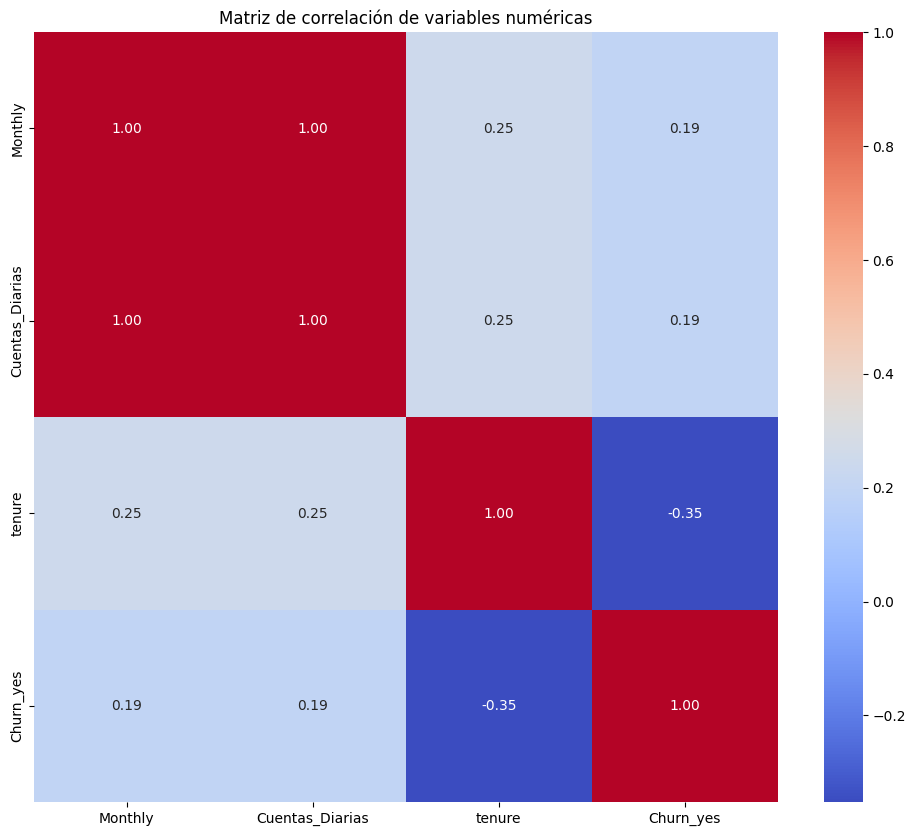


Correlación con Churn:
Churn_yes          1.000000
Cuentas_Diarias    0.193356
Monthly            0.193356
tenure            -0.352229
Name: Churn_yes, dtype: float64


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que Churn sea numérico
df_encoded[churn_col] = df_encoded[churn_col].astype(int)

# Seleccionar solo columnas numéricas
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Calcular matriz de correlación
corr_matrix = df_encoded[numeric_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas")
plt.show()

# Mostrar las correlaciones de cada variable con Churn
print("\nCorrelación con Churn:")
print(corr_matrix[churn_col].sort_values(ascending=False))


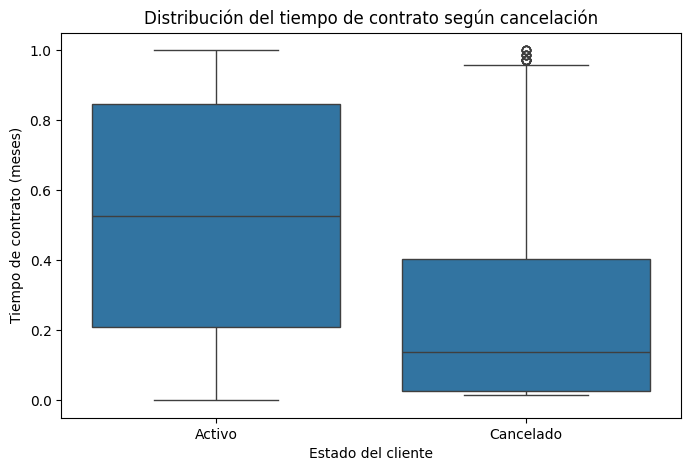

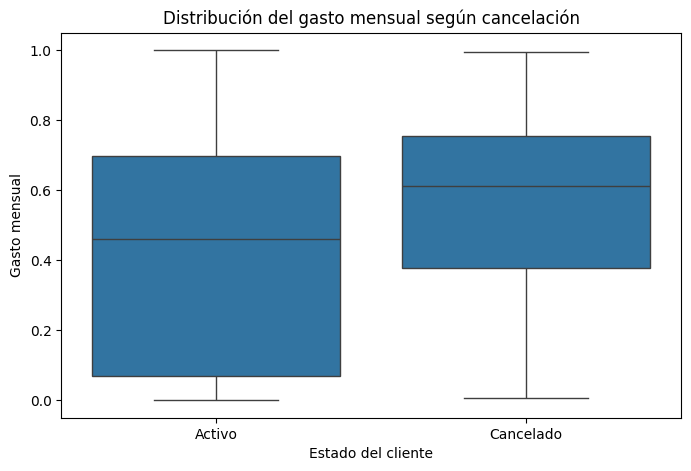

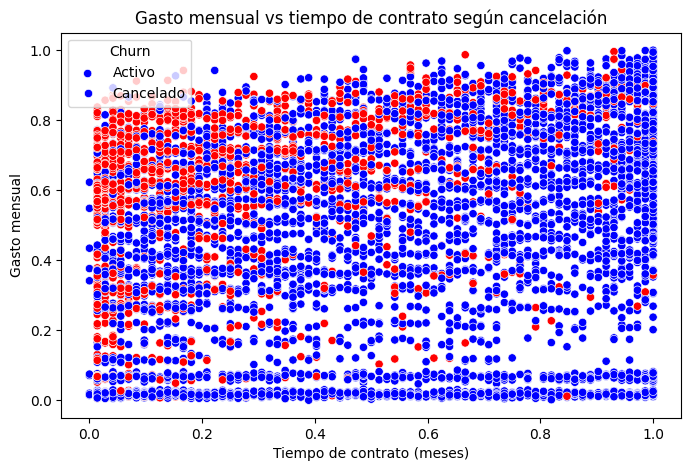

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos que Churn es numérico
churn_col = [col for col in df_encoded.columns if "Churn" in col][0]
df_encoded[churn_col] = df_encoded[churn_col].astype(int)

# 1️⃣ Boxplot: Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x=churn_col, y='tenure', data=df_encoded)
plt.xticks([0,1], ['Activo', 'Cancelado'])
plt.title('Distribución del tiempo de contrato según cancelación')
plt.ylabel('Tiempo de contrato (meses)')
plt.xlabel('Estado del cliente')
plt.show()

# 2️⃣ Boxplot: Monthly vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x=churn_col, y='Monthly', data=df_encoded)
plt.xticks([0,1], ['Activo', 'Cancelado'])
plt.title('Distribución del gasto mensual según cancelación')
plt.ylabel('Gasto mensual')
plt.xlabel('Estado del cliente')
plt.show()

# 3️⃣ Scatter plot: Tenure vs Monthly, coloreando por Churn
plt.figure(figsize=(8,5))
sns.scatterplot(x='tenure', y='Monthly', hue=churn_col, data=df_encoded, palette={0:'blue', 1:'red'})
plt.title('Gasto mensual vs tiempo de contrato según cancelación')
plt.xlabel('Tiempo de contrato (meses)')
plt.ylabel('Gasto mensual')
plt.legend(title='Churn', labels=['Activo', 'Cancelado'])
plt.show()


#🤖 Modelado Predictivo

In [140]:
from sklearn.model_selection import train_test_split

# Detectar la columna de Churn
churn_col = [col for col in df_encoded.columns if "Churn" in col][0]

# Variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop(columns=[churn_col])
y = df_encoded[churn_col]

# División en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamaños
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (4930, 21)
Tamaño de X_test: (2113, 21)
Tamaño de y_train: (4930,)
Tamaño de y_test: (2113,)


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# -----------------------------------------------------
# 1️⃣ Modelo 1: Regresión Logística (requiere normalización)
# -----------------------------------------------------
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test)

# Métricas
print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# -----------------------------------------------------
# 2️⃣ Modelo 2: Random Forest (no requiere normalización)
# -----------------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Métricas
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Regresión Logística ===
Accuracy: 0.791292001893043
Precision: 0.6382488479262672
Recall: 0.49376114081996436
F1-score: 0.5567839195979899
Confusion Matrix:
 [[1395  157]
 [ 284  277]]

=== Random Forest ===
Accuracy: 0.7671557027922385
Precision: 0.5758241758241758
Recall: 0.46702317290552586
F1-score: 0.515748031496063
Confusion Matrix:
 [[1359  193]
 [ 299  262]]


#Evaluación y comparación de modelos de predicción de churn

##1️ Métricas obtenidas

Regresión Logística

Accuracy: 0.791

Precision: 0.638

Recall: 0.494

F1-score: 0.557

Matriz de confusión:

[[1395  157]
 [ 284  277]]


Random Forest

Accuracy: 0.767

Precision: 0.576

Recall: 0.467

F1-score: 0.516

Matriz de confusión:

[[1359  193]
 [ 299  262]]


##2️ Análisis comparativo

Exactitud (Accuracy)

Regresión Logística tiene mayor exactitud (~79% vs ~77%).

Indica que en general predice mejor la mayoría de los casos.

Precisión

Regresión Logística predice mejor los casos de “cancelación” (64% vs 57%).

Recall

Ambos modelos tienen recall bajo (<50%), lo que significa que muchos clientes que realmente cancelaron no fueron identificados.

Esto se debe al desbalance de clases (solo ~26% cancelaron).

F1-score

Regresión Logística: 0.557

Random Forest: 0.516

La Regresión Logística lidera en el balance entre precisión y recall.

##3️ Posibles problemas de overfitting o underfitting

Random Forest

No muestra overfitting grave; se puede ajustar n_estimators o max_depth para mejorar resultados.

Regresión Logística

Bajo recall indica que puede estar underfitting sobre la clase minoritaria.

Ajustes posibles: balancear clases (class_weight='balanced') o cambiar el umbral de predicción.

##️ Conclusión

Mejor desempeño general: Regresión Logística, según accuracy, precision y F1-score.

Problema común: ambos modelos tienen dificultades para capturar la clase minoritaria (clientes que cancelan).

Siguiente paso recomendable: balancear clases (SMOTE, oversampling, weighting) y reentrenar los modelos para mejorar recall y F1-score.

#📋 Interpretación y Conclusiones

🔹 Variables más importantes según Regresión Logística:


,Variable,Coeficiente
2,tenure,-3.245295
4,InternetService_Fiber optic,1.248200
13,TechSupport_Yes,-0.579966
7,OnlineSecurity_Yes,-0.391267
19,MultipleLines_No phone service,0.374937
20,MultipleLines_Yes,0.367017
15,StreamingTV_Yes,0.319872
17,StreamingMovies_Yes,0.269491
12,TechSupport_No internet service,-0.198989
8,OnlineBackup_No internet service,-0.198989


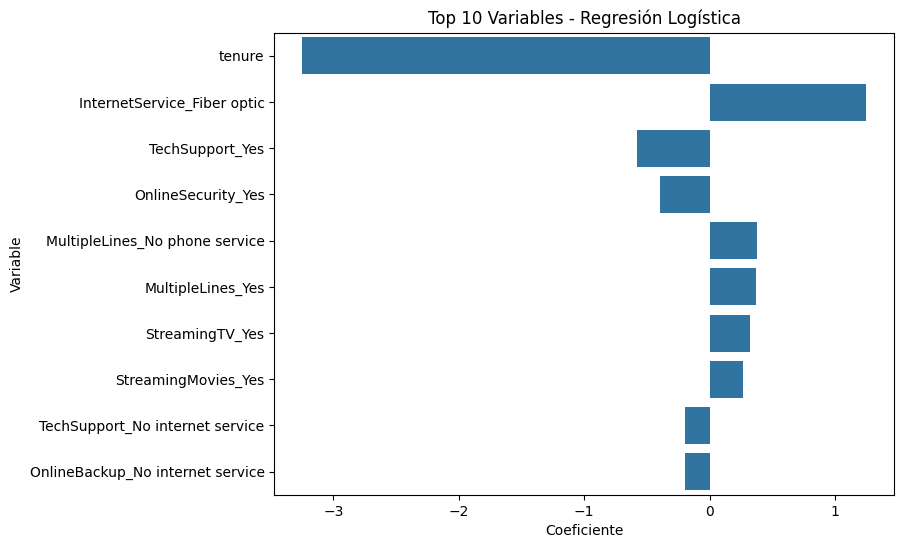

🔹 Variables más importantes según Random Forest:


,Variable,Importancia
2,tenure,0.307619
0,Monthly,0.198548
1,Cuentas_Diarias,0.197804
4,InternetService_Fiber optic,0.050687
7,OnlineSecurity_Yes,0.033540
13,TechSupport_Yes,0.033130
3,gender_Male,0.026656
9,OnlineBackup_Yes,0.022506
11,DeviceProtection_Yes,0.018747
20,MultipleLines_Yes,0.015798


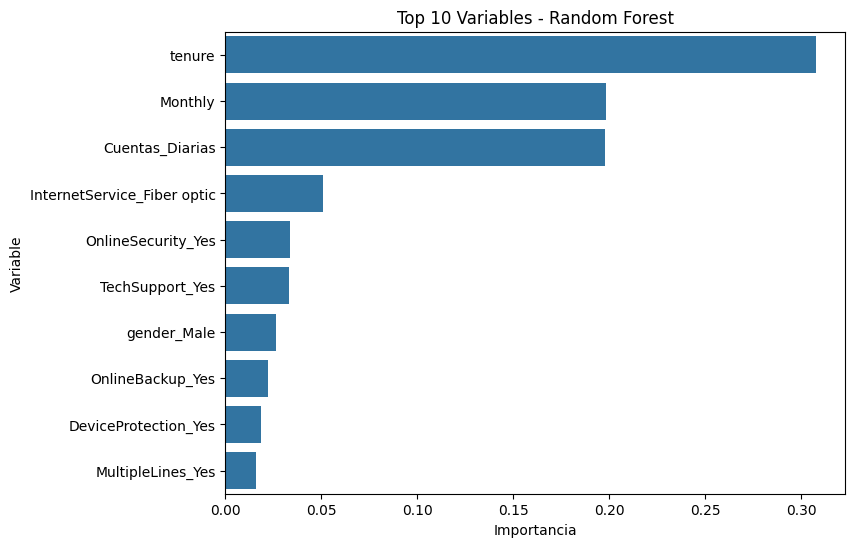

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------------------
# 1️⃣ Regresión Logística: coeficientes
# ------------------------------
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': logreg.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("🔹 Variables más importantes según Regresión Logística:")
display(coef_df.head(10))

# Visualizar los 10 coeficientes más importantes
plt.figure(figsize=(8,6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df.head(10))
plt.title('Top 10 Variables - Regresión Logística')
plt.show()

# ------------------------------
# 2️⃣ Random Forest: importancia de variables
# ------------------------------
rf_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("🔹 Variables más importantes según Random Forest:")
display(rf_importance_df.head(10))

# Visualizar los 10 features más importantes
plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Variable', data=rf_importance_df.head(10))
plt.title('Top 10 Variables - Random Forest')
plt.show()


## Informe de Análisis de Cancelación de Clientes

### Introducción
El objetivo del análisis fue identificar los factores que más influyen en la cancelación de clientes (churn) de la empresa de telecomunicaciones, utilizando modelos predictivos. Se emplearon Regresión Logística y Random Forest como principales modelos.  

Se analizaron tanto variables continuas (como Monthly, Cuentas_Diarias, tenure) como variables categóricas relacionadas con servicios contratados (InternetService, TechSupport, OnlineSecurity, StreamingTV, StreamingMovies, etc.).

### Resultados de Regresión Logística
Los coeficientes indican la dirección y magnitud del efecto de cada variable sobre la probabilidad de cancelación:

Variable                      | Coeficiente | Interpretación
------------------------------|------------|----------------
tenure                         | -3.245     | Clientes con más antigüedad tienen menor probabilidad de cancelar.
InternetService_Fiber optic     | 1.248      | Clientes con servicio de fibra óptica presentan mayor riesgo de cancelación.
TechSupport_Yes                 | -0.580     | Tener soporte técnico reduce la probabilidad de churn.
OnlineSecurity_Yes              | -0.391     | Seguridad en línea activa disminuye la cancelación.
MultipleLines_No phone service  | 0.375      | La ausencia de servicio múltiple aumenta el riesgo de churn.
MultipleLines_Yes               | 0.367      | Tener múltiples líneas también incrementa ligeramente la cancelación.
StreamingTV_Yes                 | 0.320      | Suscripción a TV streaming aumenta probabilidad de churn.
StreamingMovies_Yes             | 0.269      | Suscripción a películas en streaming incrementa riesgo de churn.
TechSupport_No internet service | -0.199     | No aplica soporte reduce ligeramente la cancelación.
OnlineBackup_No internet service| -0.199     | No tener backup activo también reduce ligeramente la cancelación.

Interpretación clave: Las variables relacionadas con servicios adicionales (TechSupport, OnlineSecurity) tienden a reducir la cancelación, mientras que ciertos servicios de entretenimiento y la fibra óptica aumentan el riesgo de churn.

### Resultados de Random Forest
La importancia de las variables indica cuáles tienen mayor contribución a la predicción:

Variable                    | Importancia | Interpretación
----------------------------|------------|----------------
tenure                       | 0.308      | La antigüedad del cliente es el factor más influyente.
Monthly                      | 0.199      | Mayor gasto mensual se asocia con cancelación.
Cuentas_Diarias              | 0.198      | Actividad diaria del cliente impacta la retención.
InternetService_Fiber optic   | 0.051      | Clientes con fibra óptica tienen mayor riesgo de churn.
OnlineSecurity_Yes            | 0.034      | Seguridad activa ayuda a retener clientes.
TechSupport_Yes               | 0.033      | Soporte técnico reduce cancelación.
gender_Male                   | 0.027      | El género tiene un efecto menor.
OnlineBackup_Yes              | 0.023      | Backup activo contribuye ligeramente a la retención.
DeviceProtection_Yes          | 0.019      | Protección de dispositivos también ayuda.
MultipleLines_Yes             | 0.016      | Múltiples líneas aumentan ligeramente el churn.

Interpretación clave: La antigüedad y actividad financiera/demanda de servicios son determinantes en la cancelación. Las medidas de soporte y seguridad siguen siendo efectivas para la retención.

### Factores principales que afectan la cancelación
1. Tenure (antigüedad del cliente): A mayor tiempo con la empresa, menor probabilidad de churn.  
2. Servicios contratados:
   - Reductores de churn: TechSupport_Yes, OnlineSecurity_Yes, OnlineBackup_Yes, DeviceProtection_Yes.
   - Incrementadores de churn: InternetService_Fiber optic, StreamingTV_Yes, StreamingMovies_Yes, MultipleLines_Yes.
3. Gasto mensual y actividad diaria: Clientes con mayor gasto y actividad frecuente tienden a cancelar más si no se perciben beneficios o atención personalizada.

### Estrategias de retención basadas en los resultados
1. Fidelización de clientes antiguos: Diseñar programas de beneficios para clientes con mayor tenure.  
2. Refuerzo de servicios de soporte y seguridad: Promocionar TechSupport, OnlineSecurity y DeviceProtection como valor agregado.  
3. Seguimiento a clientes con fibra óptica y servicios de streaming: Detectar señales de riesgo y ofrecer incentivos o descuentos personalizados.  
4. Optimización de planes de múltiples líneas: Evaluar si la complejidad o costo del plan afecta la retención y proponer paquetes más atractivos.  
5. Programas de engagement: Incentivar el uso positivo de servicios (Cuentas_Diarias, interacción con plataformas) para reducir churn.
